# Kaggle testing

In [0]:
!pip install -U -q PyDrive

In [0]:
# import data from Google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials




In [0]:
# software, math libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import cv2

In [0]:


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# 2. Import data from google drive (id is from google drive shareable link)

# Get training data
download = drive.CreateFile({'id': '1BEp0SzrCinaDP3Icb8PkTQge5c1ymS94'})
download.GetContentFile('train_images.npy')
download = drive.CreateFile({'id': '1pKyWJtNEu3O1XukE75iOHteLHRVCDjPG'})
download.GetContentFile('train_labels.csv')

# Get test data
download = drive.CreateFile({'id': '1BEp0SzrCinaDP3Icb8PkTQge5c1ymS94'})
download.GetContentFile('test_images.npy')


Let's visualize the data with one from each class.

In [0]:
'''
read everything as 3 columns, ID, IMG, CATEGORY

Id                                                img  Category  \
0  0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    shovel   
1  1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...     rifle 

Category_num  
0             0  
1             1 

'''


#! CHANGE THIS!!

images_train = np.load('./train_images.npy', encoding='latin1')
train_labels = pd.read_csv('./train_labels.csv')

label_list = train_labels.Category.unique().tolist()
label_dict = {label:i  for i,label in enumerate(label_list)}
train_labels['Category_num'] = train_labels.Category.apply(lambda x: label_dict[x])

train_df = pd.DataFrame(images_train, columns = ['Id', 'img'])
train_df = pd.merge(train_df, train_labels, on = 'Id')

images_test = np.load('./test_images.npy', encoding='latin1')
test_df = pd.DataFrame(images_test, columns = ['Id', 'img'])

#print(train_df.head(n=5))
  
  


In [0]:
training_vectors = np.array(train_df['img'].tolist())

# Split into training and validation
validation_vectors = training_vectors[9000:]
validation_labels = train_labels['Category_num'][9000:]
training_vectors = training_vectors[:9000]
training_labels = train_labels['Category_num'][:9000]

testing_vectors = np.array(test_df['img'].tolist())

In [0]:
print(training_vectors.shape)

(9000, 10000)


In [0]:
# Get vectors and their labels
#training_vectors = training_images[:,-1]
#test_vectors = test_images[:,-1]


'''with open('train_labels.csv') as fp:
  label_lines = fp.readlines()
  training_labels = []
  for line in label_lines[1:]:
    training_labels.append(line.split(',')[1].strip())

training_labels = np.array(training_labels)'''



In [0]:
print(max(training_labels ))

30


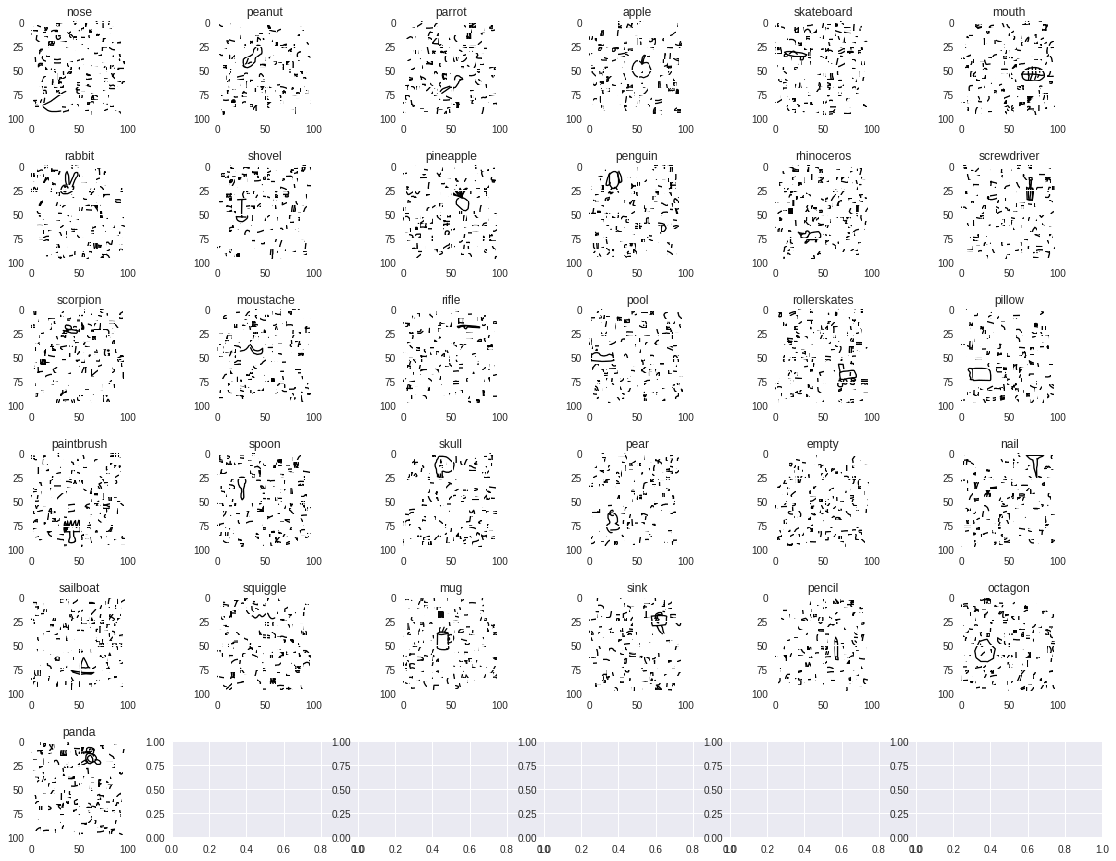

In [0]:
'''# Get first example of each class in the training data
example_labels = list(set(training_labels))
example_indices = [list(training_labels).index(x) for x in example_labels]
example_images = [training_vectors[x] for x in example_indices]

# Plot
fig, axs = plt.subplots(6,6, figsize=(20, 15))
fig.subplots_adjust(hspace = .5, wspace=0)

axs = axs.ravel()

for i, ax in enumerate(axs):
    if i < len(example_images):
      axs[i].imshow(example_images[i].reshape(100, 100))
      axs[i].set_title(example_labels[i])'''

nose


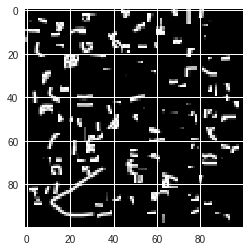

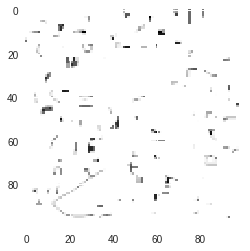

In [0]:
# Preprocessing - Erosion
import cv2

I = 14
image_train1 = (images_train[I][1]).reshape(100,100)
plt.figure()
plt.imshow(image_train1,cmap='gray')


#Printing label
print(train_labels.iloc[I].values[1])
#print(train_labels.iloc[I])



kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(image_train1,kernel,iterations = 1)
plt.figure()
plt.imshow(erosion)


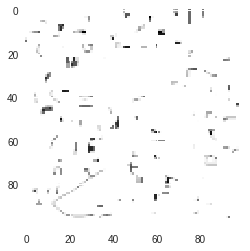

In [0]:
# Preprocessing - dilation

kernel2 = np.ones((1,1),np.uint8)
dilation = cv2.dilate(erosion,kernel2,iterations = 1)
plt.figure()
plt.imshow(dilation)

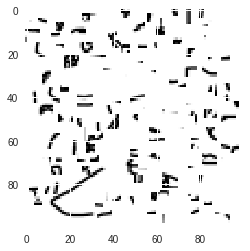

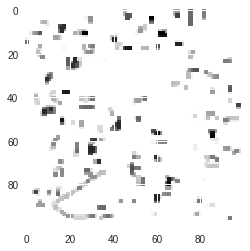

In [0]:
# Pre processing 
plt.figure()
plt.imshow(image_train1)
#kernelhm = np.ones((1,1),np.uint8)
kernelhm = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
openning = cv2.morphologyEx(image_train1, cv2.MORPH_OPEN, kernel)
plt.figure()
plt.imshow(openning)


## Baseline SVM

Let's use an SVM classifier to get a baseline rate to beat.

In [0]:
from sklearn.metrics import classification_report
clf = SVC(gamma='auto')

# Train the SVM

#print(training_vectors[:1000].shape)
#print(training_labels[:1000].shape)
clf.fit(training_vectors, training_labels)

predicted = clf.predict(validation_vectors)
# Test the test data
print(clf.score(validation_vectors, validation_labels))
print(classification_report(validation_labels, predicted))

0.057
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        19
          1       0.00      0.00      0.00        37
          2       0.00      0.00      0.00        35
          3       0.00      0.00      0.00        43
          4       0.00      0.00      0.00        14
          5       0.00      0.00      0.00        47
          6       0.06      1.00      0.11        57
          7       0.00      0.00      0.00        47
          8       0.00      0.00      0.00        31
          9       0.00      0.00      0.00        21
         10       0.00      0.00      0.00        43
         11       0.00      0.00      0.00        28
         12       0.00      0.00      0.00        41
         13       0.00      0.00      0.00        26
         14       0.00      0.00      0.00        37
         15       0.00      0.00      0.00        52
         16       0.00      0.00      0.00        28
         17       0.00      0.00      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print(clf.score(training_vectors, training_labels))

# Filter for the objects
# Using open CV

In [0]:
#train_data = training_vectors.reshape(9000, 100, 100, 1)
#valid_data = validation_vectors.reshape(1000, 100, 100, 1)

from keras.utils import to_categorical
#one-hot encode target column
train_targets = to_categorical(training_labels)
validation_targets = to_categorical(validation_labels)
train_targets[0]

Using TensorFlow backend.


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [0]:
def filter_noise(image, plot=False):
  image_train1 = np.uint8(image)
  image_train1 = image_train1.reshape(100, 100)
  
  if plot:
    print('Original image')
    plt.figure()
    plt.imshow(image_train1)
  
  # Get threshold and find contours
  ret, thresh = cv2.threshold(image_train1, 127, 255, 0)#0, 255, cv2.THRESH_BINARY)
  (img2,cnts, _) = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # We want to keep the largest contour
  largest = max(cnts, key = len)
  image_copy = image_train1.copy()
  cv2.drawContours(image_copy, [largest], 0, (0,255,0), 3)
  
  
  if plot:
    print('Filtered image')
    plt.figure()
    plt.imshow(image_copy)
  
  # Diff between filtered and unfiltered images
  diff = cv2.subtract(image_train1 , image_copy)
  
  if plot:
    print('Object after filtering')
    plt.figure()
    plt.imshow(diff)
    
  return diff


In [0]:
from scipy import ndimage


def center_image(im, plot = False):
  
  im = np.uint8(im)

  im = im.reshape(100, 100)
  
  if plot:
    plt.figure()
    plt.imshow(im)
  
  # Get the largest contour from the now-filtered image (this should
  # just be the object in the image now)
  im_copy = im.copy()
  ret, thresh = cv2.threshold(im_copy, 0, 127, 0)
  thresh_copy = thresh.copy()
  (img2,cnts, _) = cv2.findContours(thresh_copy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  largest = max(cnts, key = len)
  
  # Crop the image according to the largest contour
  x, y, w, h = cv2.boundingRect(largest)
  cropped = im_copy[y:y+h, x:x+w]
  if plot:
    plt.figure()
    plt.imshow(cropped)
  
  # Pad on all sizes, to 100x100
  desired_size = 100
  old_size = cropped.shape[:2] # old_size is in (height, width) format
  new_size = old_size
  delta_w = desired_size - new_size[1]
  delta_h = desired_size - new_size[0]
  top, bottom = delta_h//2, delta_h-(delta_h//2)
  left, right = delta_w//2, delta_w-(delta_w//2)
  color = [0, 0, 0]
  new_im = cv2.copyMakeBorder(cropped, top, bottom, left, right, cv2.BORDER_CONSTANT,
      value=color)
  
  if plot:
    print('image after:')
    plt.figure()
    plt.imshow(new_im)
  
  return new_im



In [0]:
def preprocess_image(image):
  image = filter_noise(image)
  image = center_image(image)
  return image

In [0]:
# Loop over train, validation
train_data_preproc, valid_data_preproc = [], []
for datapoint in training_vectors:
  train_data_preproc.append(preprocess_image(datapoint))
  
for datapoint in validation_vectors:
  valid_data_preproc.append(preprocess_image(datapoint))

# Pickle the filtered objects
# store pickle to google drive

In [36]:
import pickle
from google.colab import drive

drive.mount('/content/drive/')
DATA_PATH = "/content/drive/My Drive/kaggle_hw4"


## testing load pickle


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os

# Pickle the preprocessed train, valid data
# ONLY PICKLE ONCE!

with open(os.path.join(DATA_PATH, "train_data_preproc.pickle"), 'wb') as jar:
    pickle.dump(train_data_preproc, jar, protocol=pickle.HIGHEST_PROTOCOL)
    
    
with open(os.path.join(DATA_PATH, "valid_data_preproc.pickle"), 'wb') as jar:
    pickle.dump(valid_data_preproc, jar, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
# RUN THIS TO LOAD THE PICKLE!

with open(os.path.join(DATA_PATH, 'train_data_preproc.pickle'), 'rb') as jar:
  train_data = pickle.load(jar)
  
with open(os.path.join(DATA_PATH, 'valid_data_preproc.pickle'), 'rb') as jar:
  valid_data = pickle.load(jar)

print(len(train_data))



9000


(9000, 100, 100)
(9000, 100, 100)
(1000, 100, 100)
(1000, 100, 100)


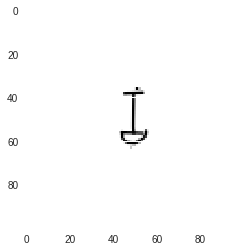

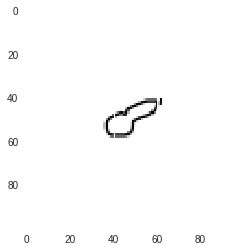

In [0]:
# type conversion from List of array to array of arrays (for VGG)

##################
# ONLY RUN ONCE!!
###################

train_data = np.array(train_data)
print(train_data.shape)

print(train_data.shape)



valid_data = np.array(valid_data)
print(valid_data.shape)

print(valid_data.shape)

plt.figure()
plt.imshow(train_data[0].reshape(100, 100))
plt.figure()
plt.imshow(valid_data[0].reshape(100, 100))


# Kera CNN

### Batch Sampler

In [0]:
def myGenerator():

    while 1:
        for i in range(300): # 300 * 30 -> # of training samples
            if i%300==0:
                print("i = " + str(i))
            yield train_data[i*30:(i+1)*30], train_targets[i*30:(i+1)*30]


In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()


['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(100,100,1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(31, activation='softmax'))

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
#model.fit(train_data, train_targets, validation_data=(validation_data, validation_targets), epochs=100)
model.fit_generator(myGenerator(), steps_per_epoch = 9000, epochs=1, verbose=1, callbacks=None,  validation_data=None, class_weight=None, nb_worker=1)


# Trying VGG pretrained model

In [0]:
# reshape to n by 100 by 100 by 3 for VGG
#train_data = train_data.reshape(train_data.shape + (1,))
#valid_data = valid_data.reshape(valid_data.shape + (1,))


vgg_train_data = np.stack((train_data,train_data,train_data), axis = -1)
print(vgg_train_data.shape)
#vgg_train_data= vgg_train_data.reshape(9000, 100, 100, 3)
print(vgg_train_data.shape)


vgg_validation_data = np.stack((valid_data, valid_data, valid_data), axis = -1)
#vgg_validation_data = vgg_validation_data.reshape(1000, 100, 100, 3)
print(vgg_validation_data.shape)


(9000, 100, 100, 3)
(9000, 100, 100, 3)
(1000, 100, 100, 3)


In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np
from keras.optimizers import SGD


#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

#Create your own input format (here 3x100x100)
input = Input(shape=(100,100, 3),name = 'image_input')

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(31, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(input=input, output=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()



sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
my_model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Then training with your data ! 
my_model.fit(vgg_train_data, train_targets, validation_data=(vgg_validation_data, validation_targets), batch_size = 100, epochs=15, shuffle=True)
#my_model.fit(x=vgg_train_data, y=train_targets, batch_size=100, epochs=20, 
#             verbose=1, callbacks=None, validation_split=0.1,
#             validation_data=None,
#             shuffle=True, class_weight=None, sample_weight=None, 
#             initial_epoch=0, steps_per_epoch=None, validation_steps=None)
  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`


Train on 9000 samples, validate on 1000 samples
Epoch 1/15
9000/9000 [==============================] - 65s 7ms/step - loss: 2.7915 - acc: 0.2634 - val_loss: 2.0188 - val_acc: 0.4400
Epoch 2/15
9000/9000 [==============================] - 63s 7ms/step - loss: 1.7544 - acc: 0.5036 - val_loss: 1.6238 - val_acc: 0.5590
Epoch 3/15
9000/9000 [==============================] - 63s 7ms/step - loss: 1.4865 - acc: 0.5744 - val_loss: 1.5342 - val_acc: 0.5490
Epoch 4/15
9000/9000 [==============================] - 63s 7ms/step - loss: 1.3450 - acc: 0.6147 - val_loss: 1.4259 - val_acc: 0.5870
Epoch 5/15
9000/9000 [==============================] - 63s 7ms/step - loss: 1.2587 - acc: 0.6348 - val_loss: 1.3984 - val_acc: 0.6110
Epoch 6/15
9000/9000 [==============================] - 63s 7ms/step - loss: 1.1852 - acc: 0.6569 - val_loss: 1.3588 - val_acc: 0.6250
Epoch 7/15
9000/9000 [==============================] - 63s 7ms/step - loss: 1.1096 - acc: 0.6804 - val_loss: 1.3438 - val_acc: 0.6170
Epoch 8

In [0]:
print(DATA_PATH)

/content/drive/My Drive/kaggle_hw4


In [0]:
import keras
my_model.save(os.path.join(DATA_PATH, 'vgg_15_epoch.h5'))
#my_model = keras.models.load_model(os.path.join(DATA_PATH + 'vgg_10_epoch.h5'))

In [47]:
!ls '/content/drive/My Drive/kaggle_hw4'

#drive.mount('/content/drive')
#DATA_PATH = "/content/drive/kaggle_hw4"

sample_submission.csv  train_data_preproc.pickle  valid_data_preproc.pickle
test_images.npy        train_images.npy		  vgg_15_epoch.h5
test_predicted.pickle  train_labels.csv


In [0]:
import keras

saved_model = keras.models.load_model(os.path.join(DATA_PATH , 'vgg_15_epoch.h5'))

In [42]:

score = saved_model.evaluate(x = vgg_validation_data, y= validation_targets)
print("eval from save model", score)

1000/1000 [==============================] - 4s 4ms/step
eval from save model [1.3589718527793884, 0.63]


In [43]:
testing_data = testing_vectors.reshape(testing_vectors.shape[0], 100, 100)

vgg_test_data = np.stack((testing_data,testing_data,testing_data), axis = -1)
print(vgg_test_data.shape)




(10000, 100, 100, 3)


In [0]:
test_predicted = saved_model.predict(vgg_test_data)


In [0]:
with open(os.path.join(DATA_PATH, "test_predicted.pickle"), 'wb') as jar:
    pickle.dump(test_predicted, jar, protocol=pickle.HIGHEST_PROTOCOL)